In [3]:
import time
import pandas as pd
import numpy as np
import h5py
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(5.0,4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv("/content/drive/MyDrive/customer_churn_dataset")

# New section

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
import seaborn as sns

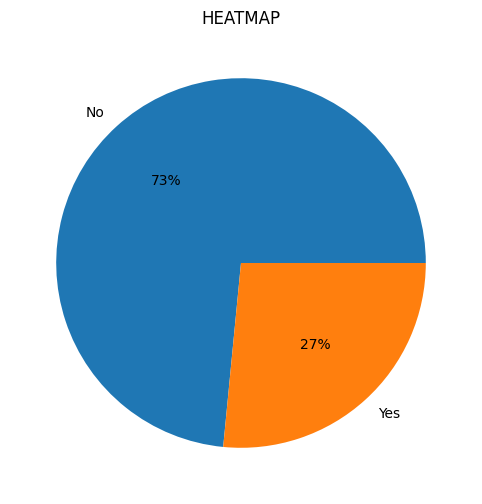

In [11]:
plt.figure(figsize=(10,6))
churn_value=df['Churn'].value_counts()
plt.pie(churn_value,labels=churn_value.index,autopct='%.0f%%')
plt.title('HEATMAP')
plt.show()

In [12]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

<Figure size 2000x800 with 0 Axes>

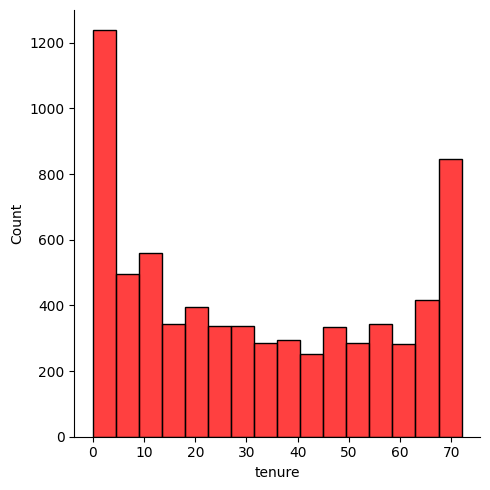

In [14]:
plt.figure(figsize=(20,8))
sns.displot(df.tenure, color='red')
plt.show()

In [15]:

df['tenure']=df['tenure'].replace(0,df['tenure'].mean())

In [16]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df.drop('customerID',axis=1,inplace=True)

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df,anoot=True,cmap='viridis')
plt.show()

ValueError: ignored

<Figure size 2000x1500 with 0 Axes>

In [19]:
df=df.dropna(subset=['TotalCharges'])

In [20]:
from sklearn.preprocessing import LabelEncoder
col=df.select_dtypes(include=object).columns
le=LabelEncoder()
clean_df=df.copy()
for i in col:
  clean_df[i]=le.fit_transform(clean_df[i])


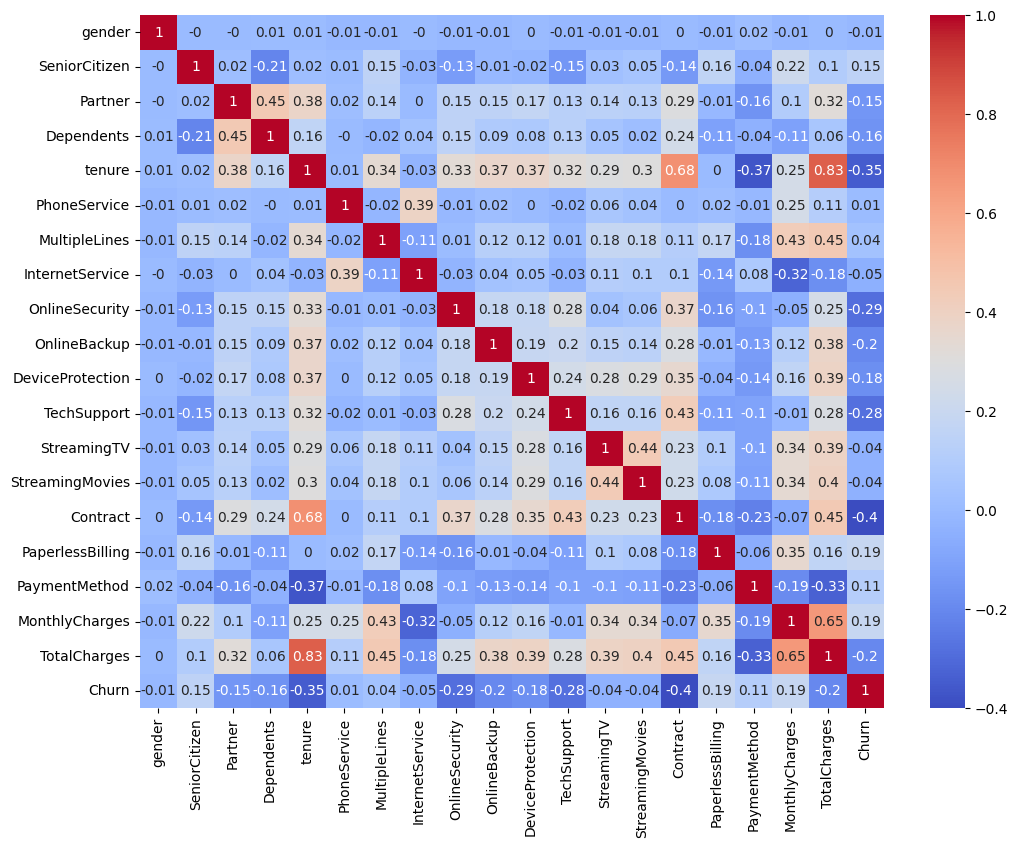

In [21]:
corr_df=clean_df.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(corr_df,annot=True,cmap='coolwarm')
plt.show()

In [22]:
clean_df.drop(['TotalCharges'],axis=1,inplace=True)

In [23]:
clean_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [24]:
clean_df.to_csv("claened_churn_dataset.csv")

In [25]:
data=pd.read_csv("claened_churn_dataset.csv")

In [26]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

In [27]:
x.shape

(7032, 19)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 19)
(1407, 19)
(5625,)
(1407,)


In [29]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

report=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(report)

Accuracy:0.7903340440653873
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.61      0.53      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model1=SVC(random_state=101)

model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_pred,y_test)
print(f"Accuracy:{accuracy}")
print(report)

Accuracy:0.7398720682302772
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1407
           1       0.00      0.00      0.00         0

    accuracy                           0.74      1407
   macro avg       0.50      0.37      0.43      1407
weighted avg       1.00      0.74      0.85      1407



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
model2=DecisionTreeClassifier(random_state=101)

model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_pred,y_test)
print(f"Accuracy:{accuracy}")
print(report)

Accuracy:0.7334754797441365
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1010
           1       0.53      0.49      0.51       397

    accuracy                           0.73      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



In [73]:
model3=RandomForestClassifier(random_state=101)

model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_pred,y_test)
print(f"Accuracy:{accuracy}")
print(report)

Accuracy:0.7960199004975125
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1118
           1       0.50      0.64      0.56       289

    accuracy                           0.80      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.82      0.80      0.80      1407



In [79]:
from sklearn.model_selection import GridSearchCV
params1={'min_samples_leaf':[2,4,5],
        'max_depth':[2,3,4],}
grid_search=GridSearchCV(model2,params1,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=101)

In [80]:
print(grid_search.best_score_)

0.7838222222222222


In [85]:

params2={'min_samples_leaf':[2,4,5],
        'max_depth':[2,3,4],
         'max_features':[5,10,12]}
grid_search=GridSearchCV(model3,params2,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, max_features=12, min_samples_leaf=4,
                       random_state=101)

In [86]:
grid_search.best_score_

0.7984000000000001

In [31]:
from sklearn.model_selection import GridSearchCV
params={'C':[0.01,0.1,1,10],
        'gamma':[0.01,.1,1],
        'kernel':["rbf"],
        }
grid_search=GridSearchCV(model1,params,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

SVC(C=1, gamma=0.01, random_state=101)

In [32]:
grid_search.best_score_

0.735111111111111